# Linear Regression

$f(x) = xw + b = \hat{y}$

- $x$  - features (i.e model input)
- $\hat{y}$  - real/continuous- valued predicted labels (i.e model output)
- $w, b$  - weights, bias (model parameters)

##### First I import any dependencies:

In [204]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

And create a simple dataset that follows a linear trend with a bit of noise.

$y = 2x + 1 +$ small_random_variation

In [205]:
# Input data
X = np.array([
    [1.0],
    [2.0],
    [3.0],
    [4.0],
    [5.0],
    [6.0],
    [7.0],
    [8.0],
    [9.0],
    [10.0]
], dtype=float)

# Labels
y = np.array([3.1, 4.9, 7.2, 8.8, 11.1, 13.0, 15.2, 16.9, 19.1, 21.2], dtype=float)

# Initialise the weights vector and bias scalar
w = np.array([0.0], dtype=float) 
b = 0.0

Now the data is loaded and the parameters are initialised, it needs to make a first prediction using the formula $f(x) = Xw + b = \hat{y}$.

In [206]:
# @ = Matrix Multiplication Syntax (np.matmul())
y_hat = X @ w + b

print(f"Prediction: {y_hat}")
print(f"Shape of prediction: {y_hat.shape}")

Prediction: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of prediction: (10,)


### Loss Function

##### Calculate the loss using Mean Squared Error (MSE) 

$L_2 = \frac{1}{N}\sum_{n=1}^{N}\left(\hat{y}_n - y_n\right)^2$

In [207]:
loss = np.mean((y_hat - y)**2)

print(f"Loss: {loss}")

Loss: 178.60100000000003


### Find the derivaties

First, find the derivatives using the [Chain Rule](https://www.youtube.com/watch?v=wl1myxrtQHQ&t=556s):


***loss** depends on **predictions*** and 
***predictions** depend on **w***


*Change in **loss** caused by **w** = (change in **loss** caused by **predictions**) × (change in **predictions** caused by **w**)*

In [208]:
N = len(X)

# The derivative of the Loss with respect to the Prediction (Error Signal)
dL_dyhat = (2 / N) * (y_hat - y)

print(f"Error signal: {dL_dyhat}")

# The derivative of the Loss with respect to the weights 
# (Input x Error Signal) because prediction scales with input
dL_dw =  np.transpose(X) @ dL_dyhat

print(f"The derivative of the Loss with respect to the weights: {dL_dw}")

# The derivative of the Loss with respect to the bias 
# (Sum of all Error Signals) because bias influences all predictions equally
dL_db = np.sum(dL_dyhat)

print(f"The derivative of the Loss with respect to the bias: {dL_db}")



Error signal: [-0.62 -0.98 -1.44 -1.76 -2.22 -2.6  -3.04 -3.38 -3.82 -4.24]
The derivative of the Loss with respect to the weights: [-165.74]
The derivative of the Loss with respect to the bias: -24.1


### Gradient Descent

Now to perform gradient descent with the derivatives:
##### The formula for gradient descent is:

$w_{\text{new}} = w_{\text{old}} - \lambda \frac{dL(w)}{dw}$

In [209]:
learning_rate = 0.001

# Updates the weights and biases based on the formula
w_new = w - learning_rate * dL_dw 
b_new = b - learning_rate * dL_db

### The Training Loop

Now we put it all together and loop so the loss continues to decrease and the predictions become more accurate.

In [210]:
w = np.array([0.0], dtype=float) 
b = 0.0
N = len(X)
learning_rate = 0.001

# We can use these lists of the loss over time to plot some data
iterations = []
loss_history = []
for i in range(100):
    # Prediction
    y_hat = X @ w + b
    
    # Loss Function
    loss = np.mean((y_hat - y)**2)

    # For Plotting Only
    if i % 10 == 0 or i == 1:
        iterations.append(i)
        loss_history.append(loss)

    # Gradient Descent
    dL_dyhat = (2 / N) * (y_hat - y)
    dL_dw =  np.transpose(X) @ dL_dyhat
    dL_db = np.sum(dL_dyhat)
    w = w - learning_rate * dL_dw 
    b = b - learning_rate * dL_db

prediction = X @ w + b
print(f"Final Weight: {w}")
print(f"Final Bias: {b}")

print(f"\nFinal Prediction: {prediction}\n")

print(f"Loss History: {loss_history}")


Final Weight: [2.10508358]
Final Bias: 0.33107603525916013

Final Prediction: [ 2.43615961  4.54124319  6.64632677  8.75141035 10.85649393 12.96157751
 15.06666109 17.17174467 19.27682825 21.38191183]

Loss History: [np.float64(178.60100000000003), np.float64(151.6525461666), np.float64(34.85035518291987), np.float64(6.875204930450702), np.float64(1.4304603471817186), np.float64(0.37023337747941265), np.float64(0.16325754177283736), np.float64(0.122333427071422), np.float64(0.11372908046387994), np.float64(0.11141965406385308), np.float64(0.11034055777388793)]


### Plot some data


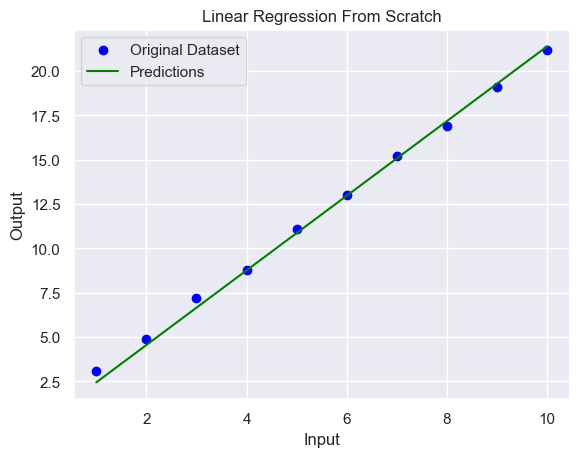

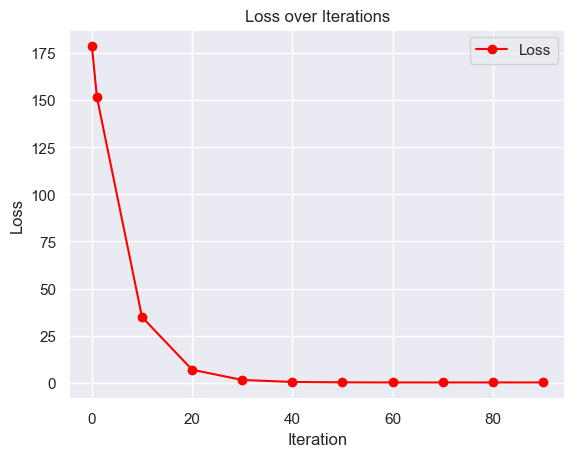

In [211]:
sns.set_theme()            
plt.scatter(X[:,0], y, label="Original Dataset", color="blue")
plt.plot(X[:,0], prediction, label="Predictions", color="green")
plt.legend(loc='upper left')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression From Scratch')

plt.show()

# New graph
plt.figure()

plt.plot(iterations, loss_history, label="Loss", color="red", marker='o')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")

plt.show()

### Optimising

To find the optimal amount of loops, we can exit the loop early with a condition checking the change in the parameters.

In [212]:
# Reinitialise everything
w = np.array([0.0], dtype=float) 
b = 0.0
N = len(X)
iterations = []
loss_history = []
learning_rate = 0.001

# Add a tolerance check for early exits
tolerance = 1e-2
prev_loss = None

for i in range(100):
    # Forward Pass
    y_hat = X @ w + b
    loss = np.mean((y_hat - y)**2)

    # For Plotting Only
    if i % 10 == 0 or i == 1:
        iterations.append(i)
        loss_history.append(loss)

    # Early Stop Check
    if prev_loss is not None:
        if abs(prev_loss - loss) < tolerance:
            print(f"Stopped early at iteration {i}")
            break

    prev_loss = loss

    # Gradients
    dL_dyhat = (2 / N) * (y_hat - y)
    dL_dw = X.T @ dL_dyhat
    dL_db = np.sum(dL_dyhat)

    # Gradient Descent
    w = w - learning_rate * dL_dw
    b = b - learning_rate * dL_db

prediction = X @ w + b
print(f"Final Weight: {w}")
print(f"Final Bias: {b}")

print(f"\nFinal Prediction: {prediction}")
print(f"\nFinal Loss: {loss}\n")

print(f"Loss History: {loss_history}")


Stopped early at iteration 50
Final Weight: [2.07242531]
Final Bias: 0.3121853362250748

Final Prediction: [ 2.38461065  4.45703595  6.52946126  8.60188657 10.67431188 12.74673719
 14.8191625  16.89158781 18.96401312 21.03643843]

Final Loss: 0.16325754177283736

Loss History: [np.float64(178.60100000000003), np.float64(151.6525461666), np.float64(34.85035518291987), np.float64(6.875204930450702), np.float64(1.4304603471817186), np.float64(0.37023337747941265), np.float64(0.16325754177283736)]


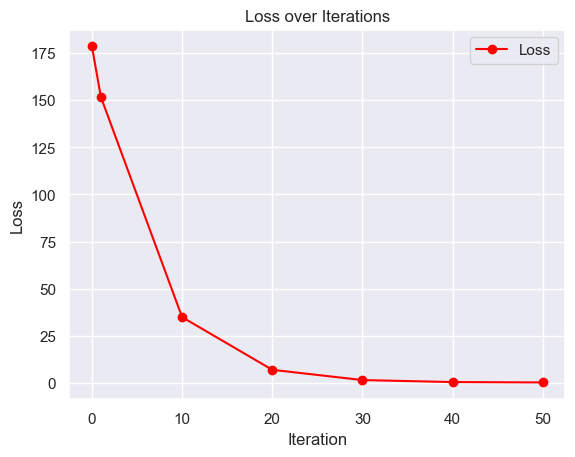

In [213]:
plt.plot(iterations, loss_history, label="Loss", color="red", marker='o')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")

plt.show()

### Moving To A Real Dataset

Now we can take this model and train and test it on a real dataset. 

First we load it.

In [214]:
from sklearn import datasets

diabetes_data, diabetes_labels = datasets.load_diabetes(return_X_y=True)

print("The dimensions of the Diabetes feature matrix", diabetes_data.shape)

The dimensions of the Diabetes feature matrix (442, 10)


Then we split the data into training and testing data.

In [215]:
from sklearn.model_selection import train_test_split

all_ids = np.arange(0, diabetes_data.shape[0])

random_seed = 1

# Randomly split the data into 50:50 to get the training set
train_set_ids, test_set_ids = train_test_split(all_ids, test_size=0.5, train_size=0.5,
                                 random_state=random_seed, shuffle=True)

training_data = diabetes_data[train_set_ids, :]
training_labels = diabetes_labels[train_set_ids]
test_data = diabetes_data[test_set_ids, :]
test_labels = diabetes_labels[test_set_ids]

# Scaling features
# Compute stats from TRAINING DATA ONLY
mean = training_data.mean(axis=0)
std = training_data.std(axis=0)

# Avoid divide-by-zero
std[std == 0] = 1

# Scale training data
training_data_scaled = (training_data - mean) / std

print("Size of the training data:", training_data.shape)
print("Size of the test data:", test_data.shape)

Size of the training data: (221, 10)
Size of the test data: (221, 10)


Now use this data in our model.

In [216]:
from sklearn.metrics import mean_squared_error

# Reinitialise everything with our training data
X = training_data_scaled
y = training_labels

w = np.zeros(len(X[0])) # Becomes a vector of zeros for the amount of columns in the training data
b = 0.0
N = len(X) # Amount of rows

iterations = []
loss_history = []
learning_rate = 0.1

# Add a tolerance check for early exits
tolerance = 1e-4
prev_loss = None

# Training Loop
for i in range(5000):
    # Forward Pass
    y_hat = X @ w + b 
    loss = np.mean((y_hat - y)**2)

    # For Plotting Only
    if i % 100 == 0 or i == 1:
        iterations.append(i)
        loss_history.append(loss)

    # Early Stop Check
    if prev_loss is not None:
        if abs(prev_loss - loss) < tolerance:
            print(f"Stopped early at iteration {i}")
            break

    prev_loss = loss

    # Gradients
    dL_dyhat = (2 / N) * (y_hat - y)
    dL_dw = X.T @ dL_dyhat
    dL_db = np.sum(dL_dyhat)

    # Gradient Descent
    w = w - learning_rate * dL_dw
    b = b - learning_rate * dL_db

prediction = X @ w + b

print(f"Final Weight: {w}")
print(f"Final Bias: {b}")

# print(f"\nFinal Prediction: {prediction}")
print(f"\nFinal Loss: {loss}\n")

print("\nMean squared error (error on training data): %.2f " % mean_squared_error(training_labels, prediction))



Stopped early at iteration 1963
Final Weight: [ -4.15370223  -7.91955983  28.11979735  12.81997268 -51.09651667
  35.17067994  14.96825421  12.74718389  43.67299348   5.78424199]
Final Bias: 155.75565610859724

Final Loss: 2739.0835448643224


Mean squared error (error on training data): 2739.08 


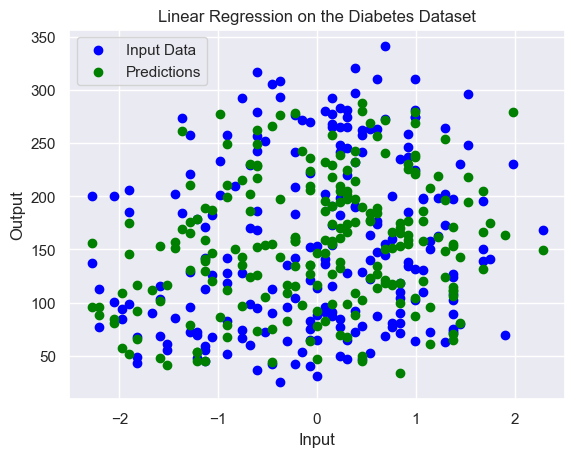

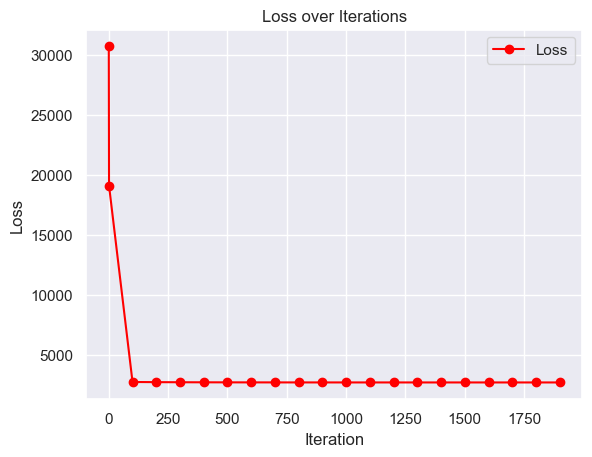

In [217]:
sns.set_theme()            
plt.scatter(X[:,0], y, label="Input Data", color="blue")
plt.scatter(X[:,0], prediction, label="Predictions", color="green")
plt.legend(loc='upper left')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression on the Diabetes Dataset')

plt.show()

# New graph
plt.figure()

plt.plot(iterations, loss_history, label="Loss", color="red", marker='o')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")

plt.show()

### Testing the model

In [218]:
X_test_scaled = (test_data - mean) / std
y_test = test_labels

y_test_hat = X_test_scaled @ w + b
test_loss = np.mean((y_test_hat - y_test)**2)

print(f"Test Loss: {test_loss}")
print("\nMean squared error (error on test data): %.2f " % mean_squared_error(test_labels, y_test_hat))




Test Loss: 3098.914000868914

Mean squared error (error on test data): 3098.91 


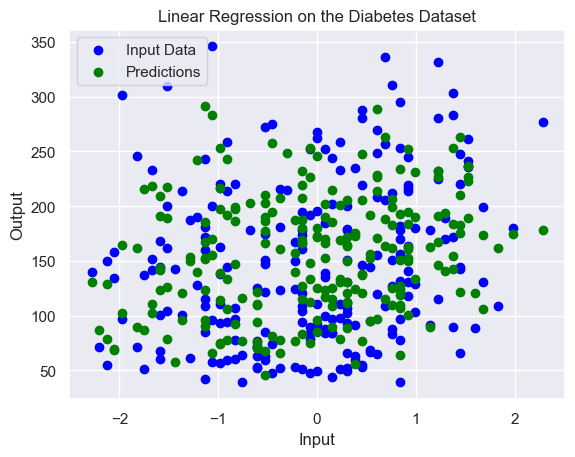

In [219]:
sns.set_theme()            
plt.scatter(X_test_scaled[:,0], y_test, label="Input Data", color="blue")
plt.scatter(X_test_scaled[:,0], y_test_hat, label="Predictions", color="green")
plt.legend(loc='upper left')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression on the Diabetes Dataset')

plt.show()

### Compare to SKLearn's Linear Regression Model

In [220]:
# Compare to sklearn's model
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)
print("\nThe weight (w):",  lr_model.coef_)
print("The bias (b):",  lr_model.intercept_)

# Check the performance of the model on the data used to train it
training_pred_y = lr_model.predict(X)
print("\nMean squared error (error on training data): %.2f " % mean_squared_error(y, training_pred_y))

# Check the performance of the model on the test data
test_pred_y = lr_model.predict(X_test_scaled)
print("\nMean squared error (error on training data): %.2f " % mean_squared_error(test_labels, test_pred_y))


The weight (w): [ -4.15982405  -7.92698961  28.10284935  12.8319501  -52.24613208
  36.05198634  15.48323872  12.925426    44.12529302   5.76612632]
The bias (b): 155.7556561085973

Mean squared error (error on training data): 2739.06 

Mean squared error (error on training data): 3100.14 


Both my model and the sklearn model have almost identical performance on the diabetes dataset and I believe this is as close as linear regression can get on it.